In [16]:
import csv
from constants import SEEDS
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_val_predict

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
SEED = SEEDS[1]

movies = pd.read_csv(f'./embeddings/movies_embeddings_sdne_[128]_150_{SEED}.csv', index_col='id', quoting=csv.QUOTE_ALL)
movies.embedding = movies.embedding.apply(lambda embedding: np.fromstring(embedding[1:-1], dtype=np.float32, sep=' '))

# Visualization

In [6]:
pca = PCA(n_components=2, random_state=SEED)
principal_components = pca.fit_transform(np.array(movies.embedding.tolist()))

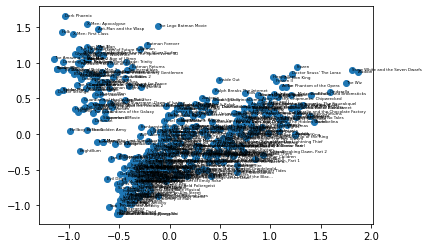

In [7]:
plt.scatter(principal_components[:, 0], principal_components[:, 1])

for index, row in movies.iterrows():
    plt.annotate(row.title, (principal_components[index, 0], principal_components[index, 1]), fontsize=4)

plt.show()

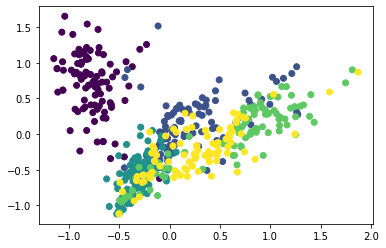

In [17]:
movies_labels = {label:index for index, label in enumerate(movies.label.unique())}
movies_colours = movies.label.map(movies_labels)

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=movies_colours)
plt.show()

# Similarity

In [18]:
cos_similarity = cosine_similarity(np.array(movies.embedding.tolist()), np.array(movies.embedding.tolist()))

In [19]:
movies_index = 50
print(movies.iloc[movies_index].title)

closest_movies = cos_similarity[movies_index].argsort()[-6:][::-1]
for closest_movie in closest_movies[1:]:
    print(movies.iloc[closest_movie].title, cos_similarity[movies_index, closest_movie])

Dark Phoenix
X-Men: Days of Future Past 0.9285557
X-Men: First Class 0.9215053
X-Men 2 0.90405256
X-Men: The Last Stand 0.90405256
X-Men: Apocalypse 0.8775105


# Classification

In [21]:
X = np.array(movies.embedding.tolist())
y = movies_colours.to_numpy()

logistic_classifier = LogisticRegression(multi_class='ovr', random_state=SEED)
predicted = cross_val_predict(logistic_classifier, X, y, cv=10)

In [22]:
print(classification_report(y, predicted, target_names=movies.label.unique()))

              precision    recall  f1-score   support

  super-hero       0.98      0.95      0.96       100
kids-fiction       0.88      0.82      0.85       100
      horror       0.82      0.92      0.87       100
     musical       0.82      0.87      0.84        93
     fantasy       0.79      0.72      0.75        92

    accuracy                           0.86       485
   macro avg       0.86      0.86      0.86       485
weighted avg       0.86      0.86      0.86       485

